In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic.info() #type확인은 필수!! #cabin은 유난히 갯수가 다름. null값이 많을듯...?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
titanic["Survived"]=titanic["Survived"].astype(object) #형변환
titanic["Pclass"]=titanic["Pclass"].astype(object)

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [19]:
titanic.isnull().sum() # null 체크

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
missing_df=titanic.isnull().sum().reset_index()
missing_df.columns=['column','count']
missing_df['ratio']=missing_df['count']/titanic.shape[0]
missing_df.loc[missing_df['ratio']!=0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


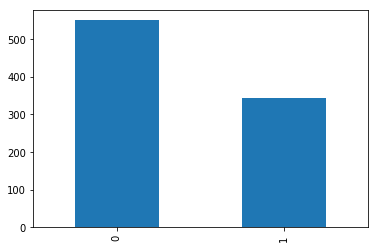

In [21]:
titanic['Survived'].value_counts().plot(kind='bar') #죽었냐 살았냐를 data로 찍어봄
plt.show() #나중에 어떤 교차검증쓸지도 판단들듯

In [22]:
category_feature=[col for col in titanic.columns if 
                 titanic[col].dtypes=="object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [23]:
category_feature=list(set(category_feature)-set(['Survived']))
category_feature

['Cabin', 'Ticket', 'Sex', 'Pclass', 'Name', 'Embarked']

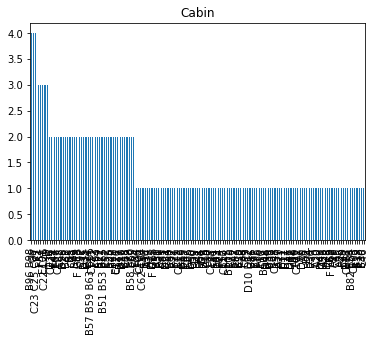

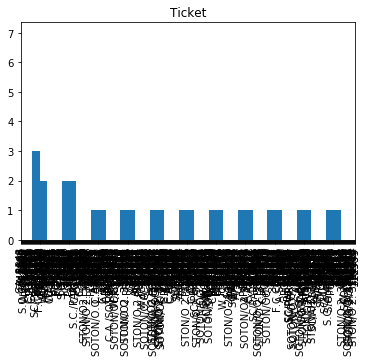

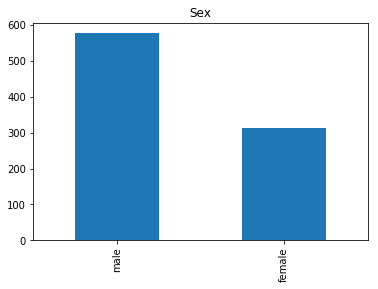

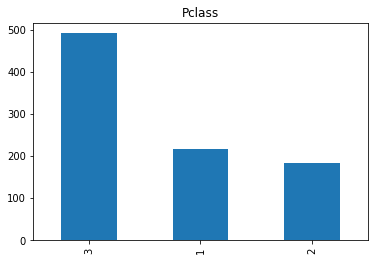

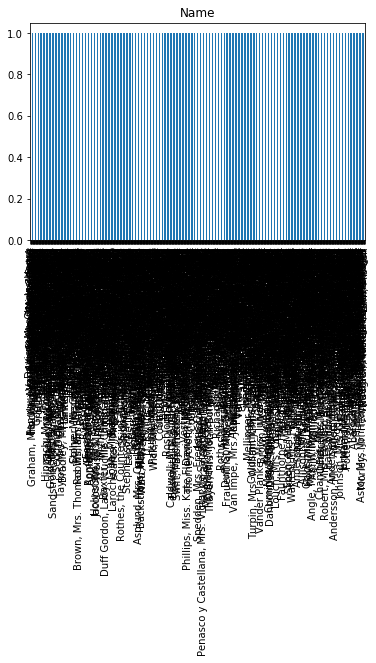

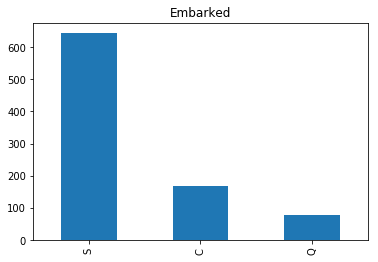

In [24]:
for col in category_feature:
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

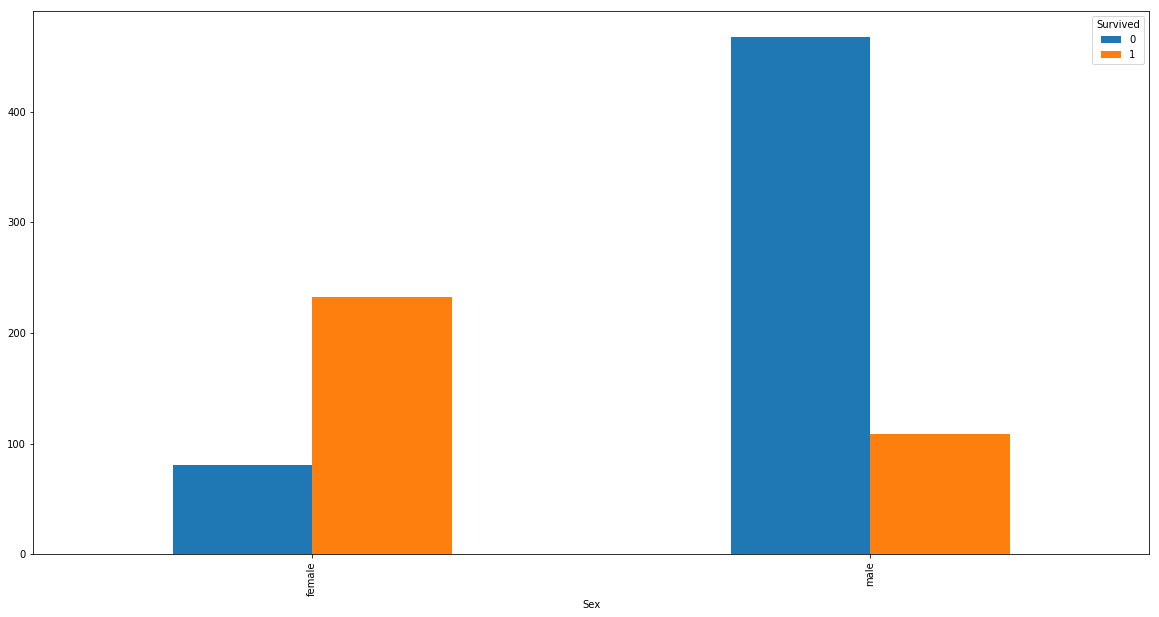

In [26]:
#이변수
sex_df=titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind="bar",figsize=(20,10))
plt.show()

In [33]:
#독립변수 - 수치형 변수 분포 확인
numerical_feature=list(set(titanic.columns)-set(category_feature)
                      -set(['PassengerId','Survived']))
numerical_feature=np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

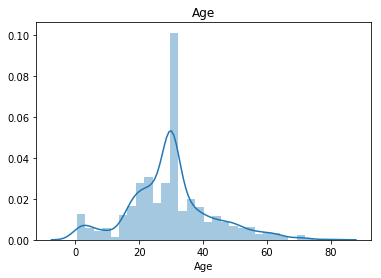

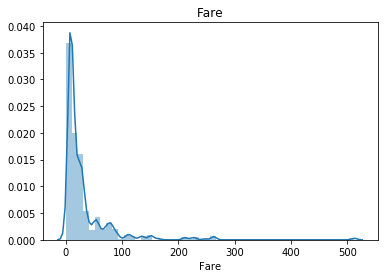

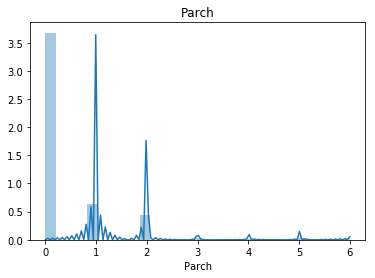

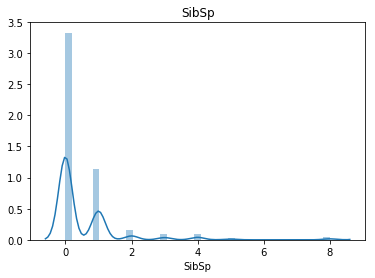

In [34]:
#단변수
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()

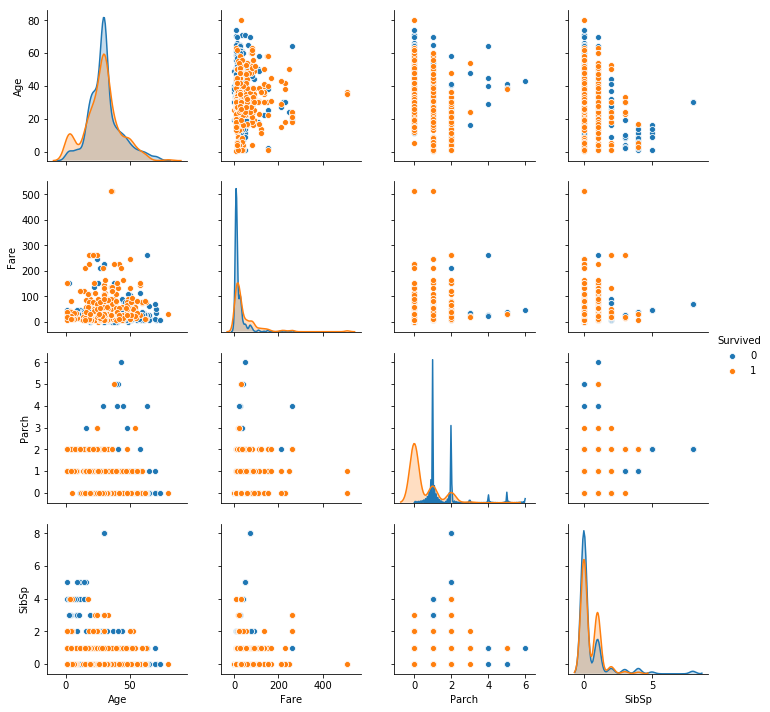

In [36]:
sns.pairplot(titanic[list(numerical_feature)+['Survived']],hue='Survived',
            x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

In [4]:
import pandas as pd
import numpy as np

In [5]:
# 훈련 데이터, 테스트 데이터를 읽어온다
trn=pd.read_csv('ssd_train.csv',na_values=['-1','-1.0'])
tst=pd.read_csv('ssd_test.csv',na_values=['-1','-1.0'])

In [6]:
print(trn.shape, tst.shape) #test는 target 변수가 없어서 변수가 하나 적음

(595212, 59) (892816, 58)


In [7]:
#데이터 첫 5줄을 확인한다
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [8]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [9]:
#변수의 최댓값, 최소값 등을 확인
trn.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#변수의 결측값을 확인
trn.isnull().sum(axis=0)

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [11]:
tst.isnull().sum(axis=0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [12]:
np.unique(trn['target'])

array([0, 1], dtype=int64)

In [13]:
1.0*sum(trn['target'])/trn.shape[0]

0.036447517859182946

In [14]:
# 훈련 데이터와 테스트 데이터를 통합한다
tst['target']=np.nan #test data에서는 target이 없었으므로 nan을 만들어 추가
df=pd.concat([trn, tst],axis=0)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#시각화 관련 라이브러리를 불러온다
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#시각화 관련 함수를 미리 정의한다
def bar_plot(col,data,hue=None):
    f,ax=plt.subplots(figsize=(10,5))
    sns.countplot(x=col,hue=hue,data=data,alpha=0.5)
    plt.show()
    
def dist_plot(col,data):
    f,ax=plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(),kde=False,bins=10)
    plt.show()
    
def bar_plot_ci(col,data):
    f,ax=plt.subplots(figsize=(10,5))
    sns.barplot(x=col,y='target',data=data)
    plt.show()

In [57]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진변수 :17개
binary=['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin',
        'ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin',
       'ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin',
       'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin',
       'ps_calc_20_bin']

#범주형 변수 : 14개
category=['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat',
         'ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat',
         'ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat',
         'ps_car_10_cat','ps_car_11_cat']

#정수형 변수 : 16개
integer=['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_calc_04',
        'ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09',
        'ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13',
        'ps_calc_14','ps_car_11']

#소수형 변수 : 10개
floats=['ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02',
       'ps_calc_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15']

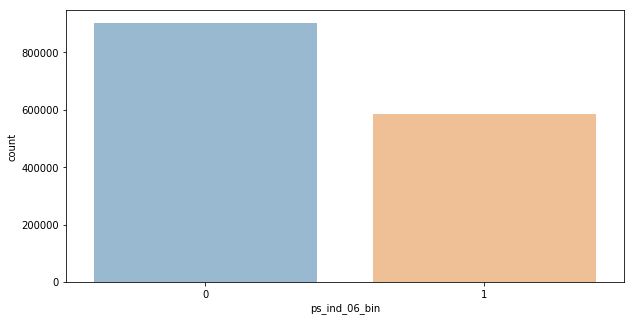

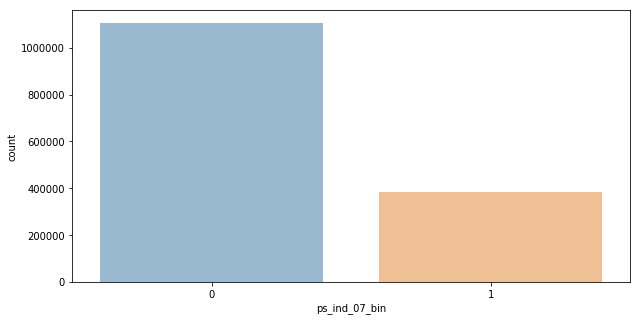

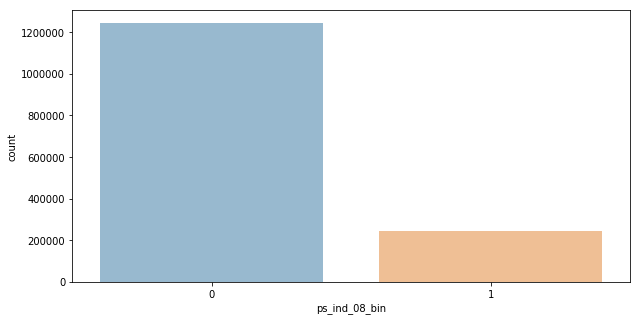

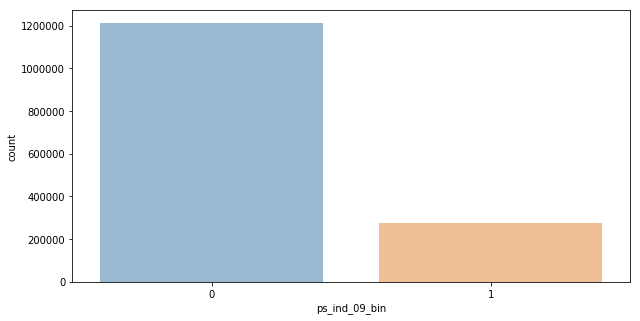

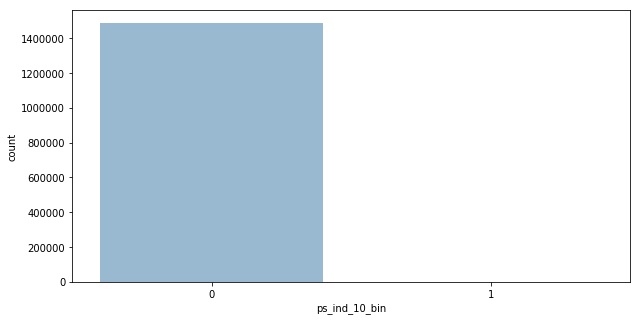

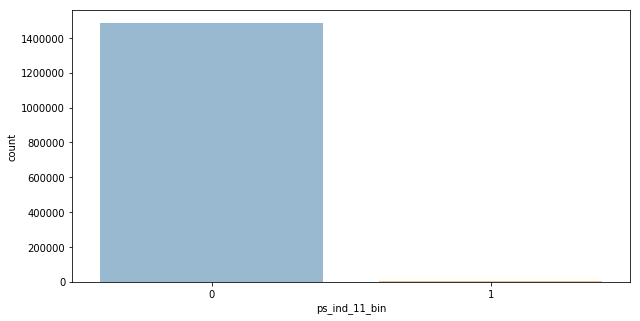

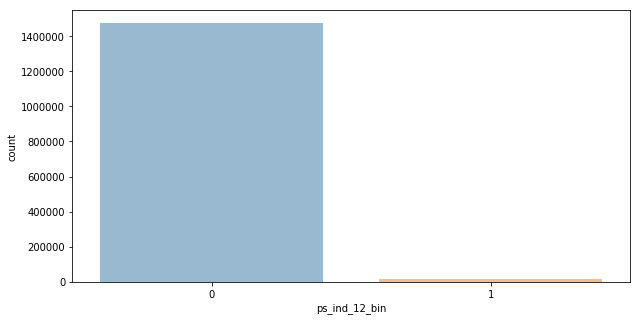

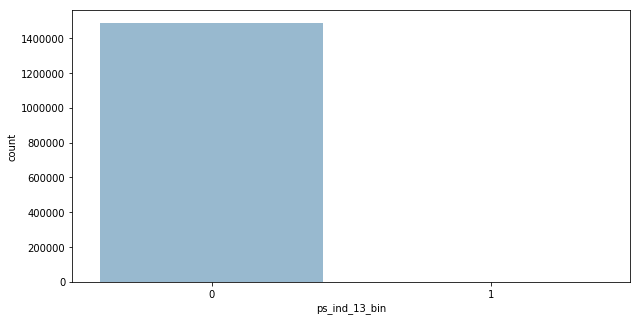

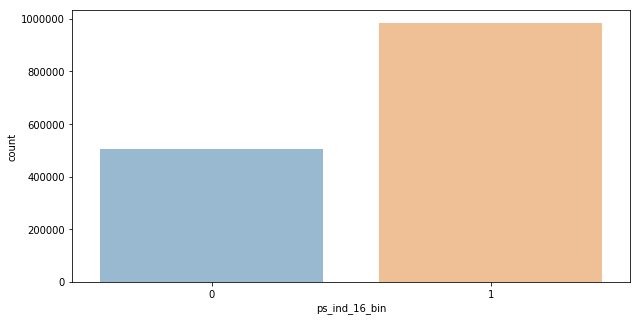

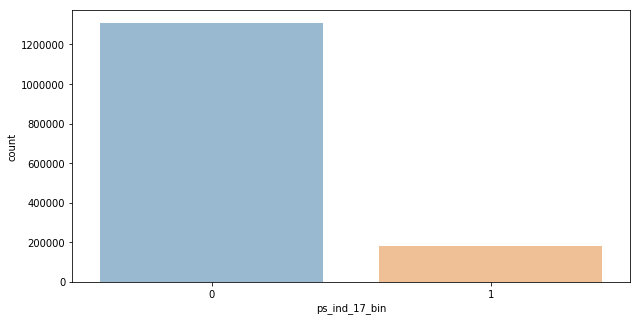

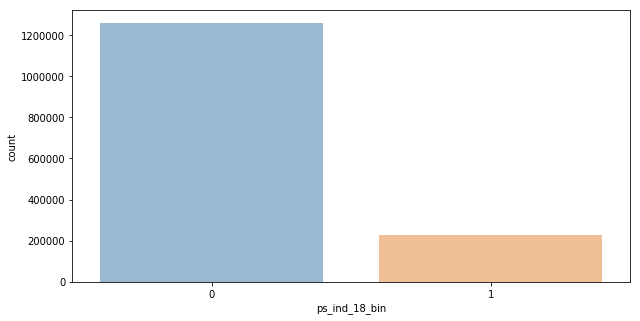

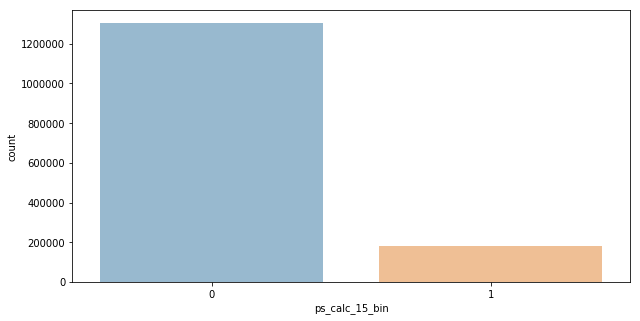

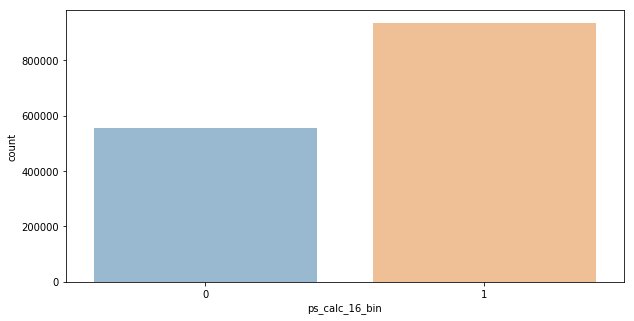

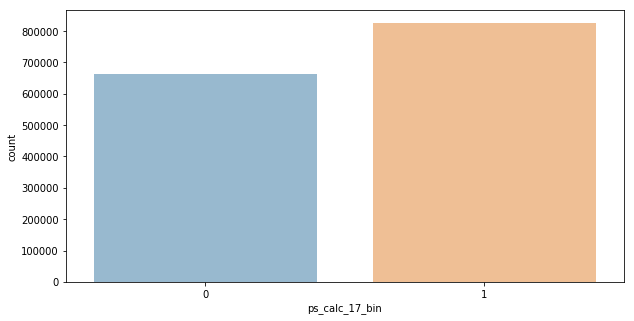

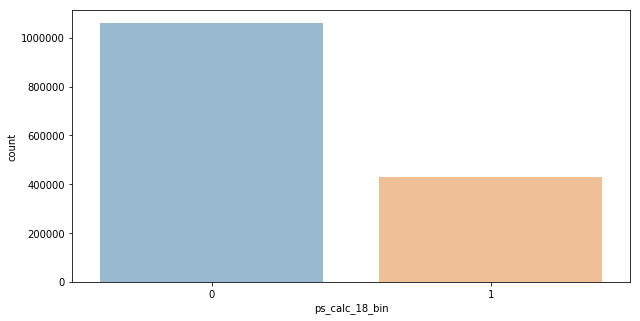

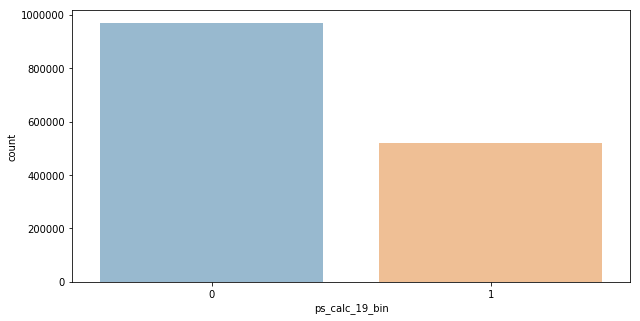

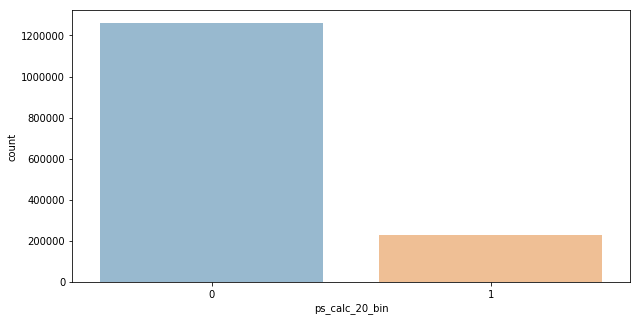

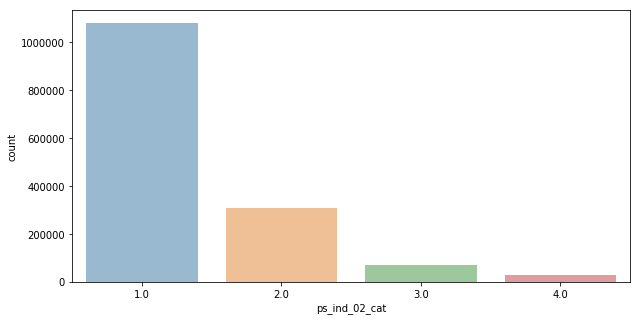

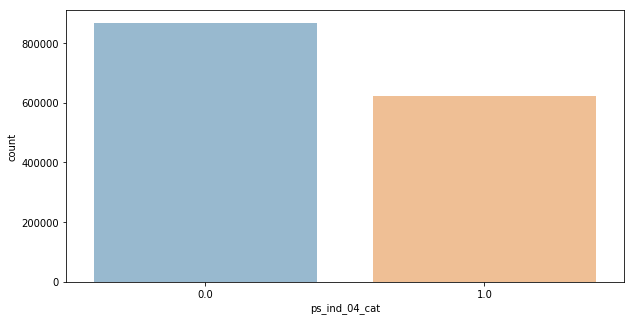

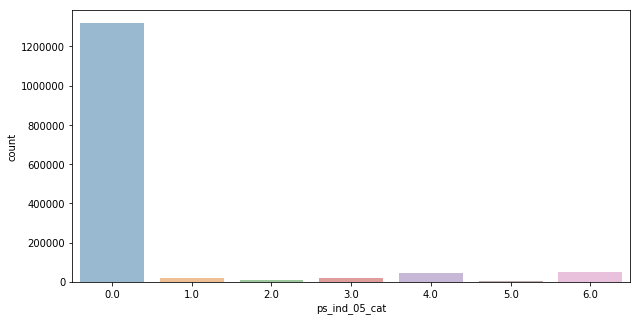

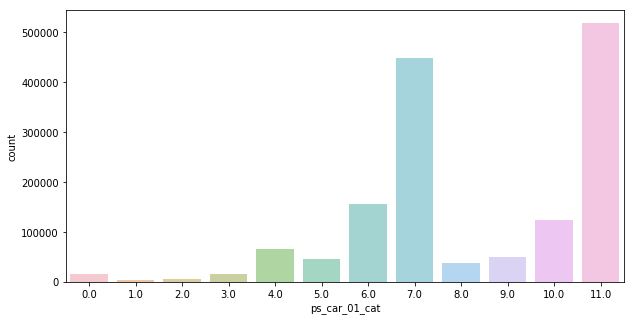

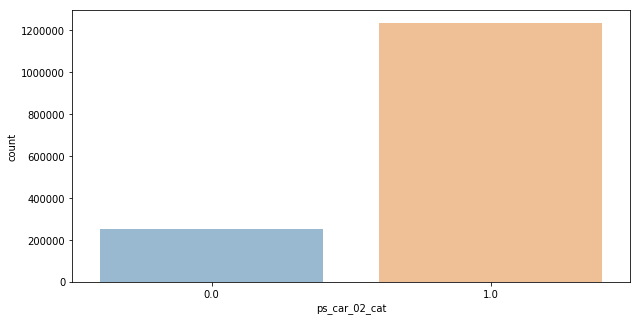

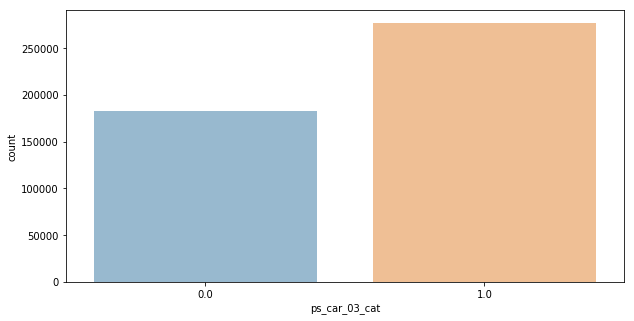

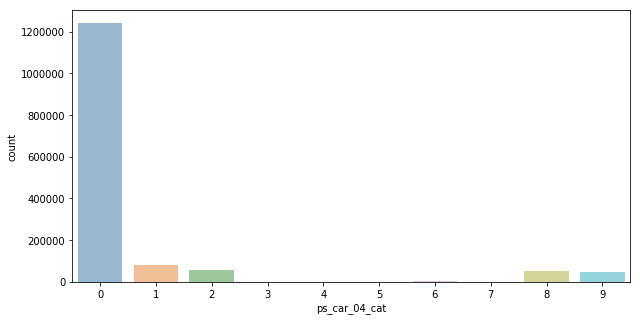

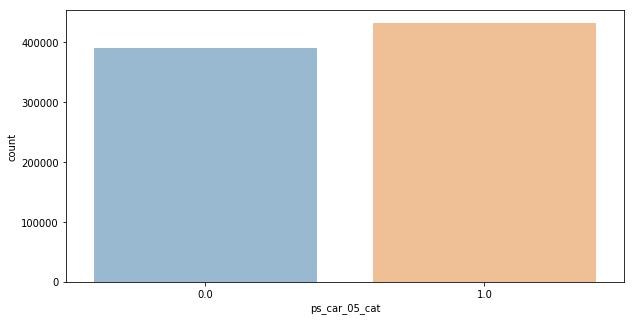

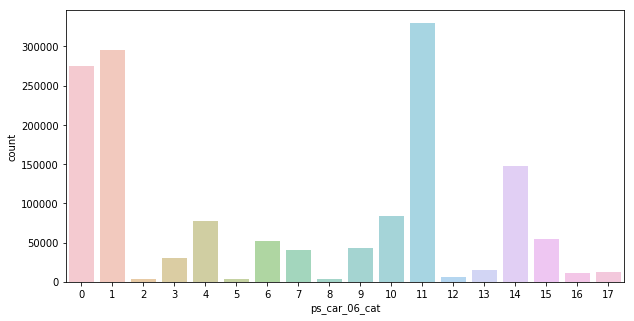

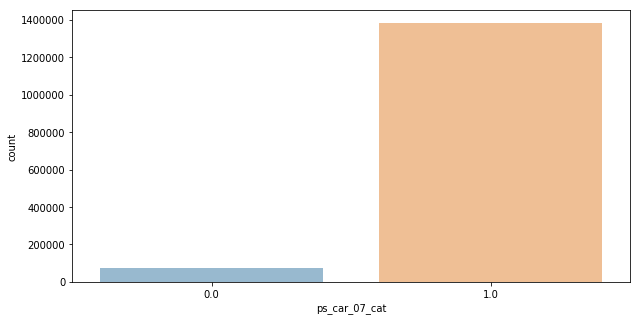

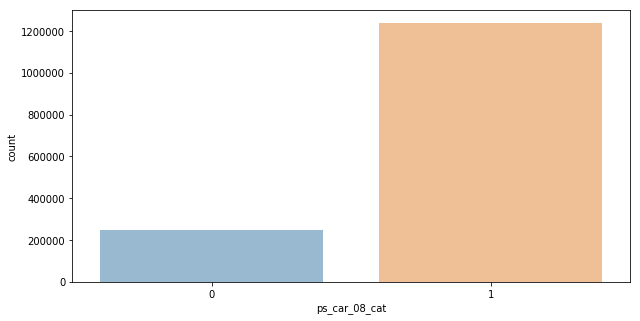

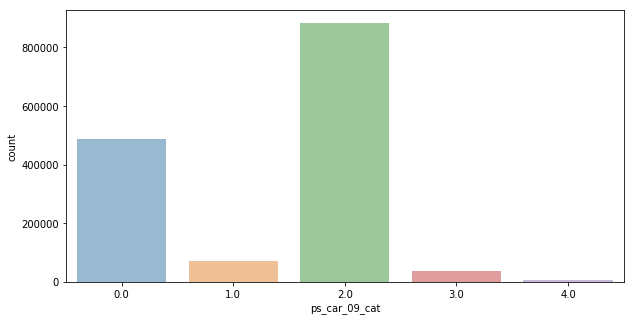

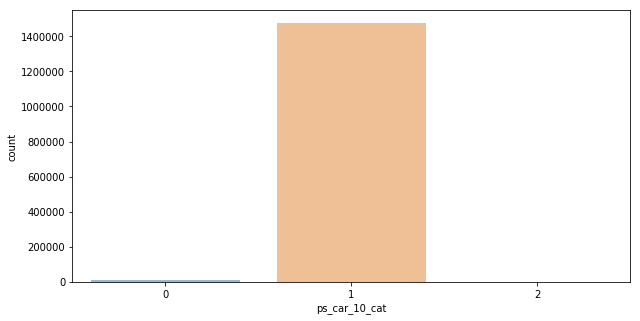

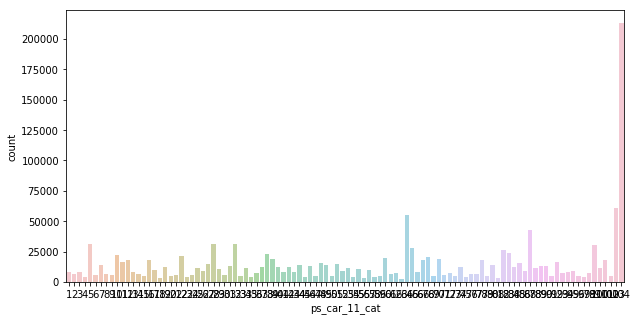

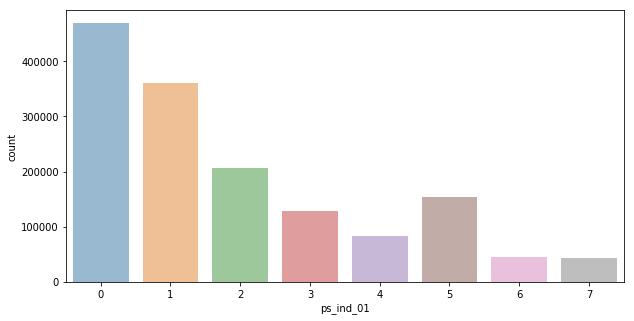

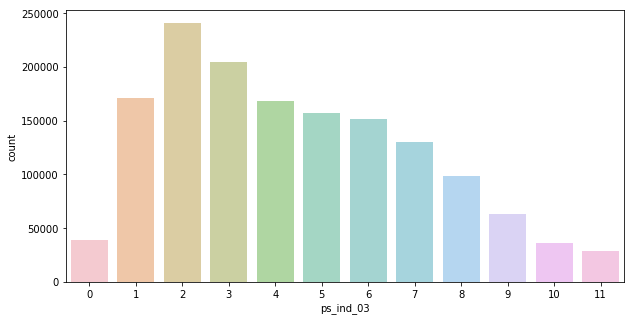

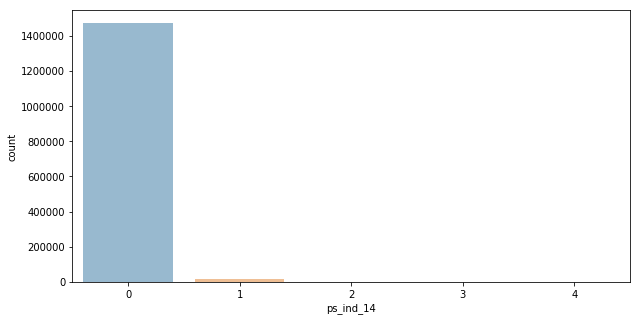

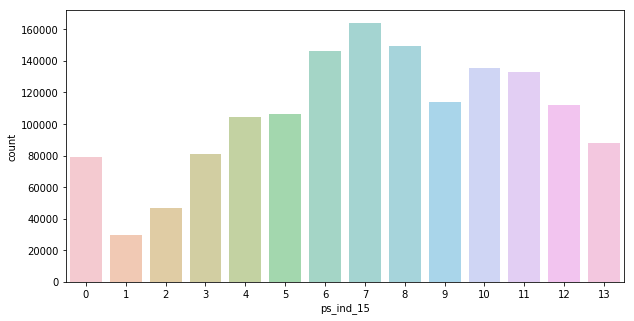

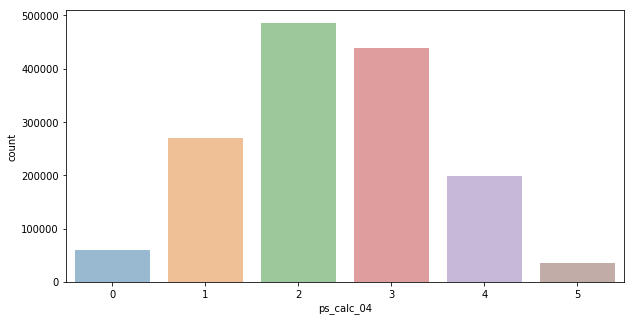

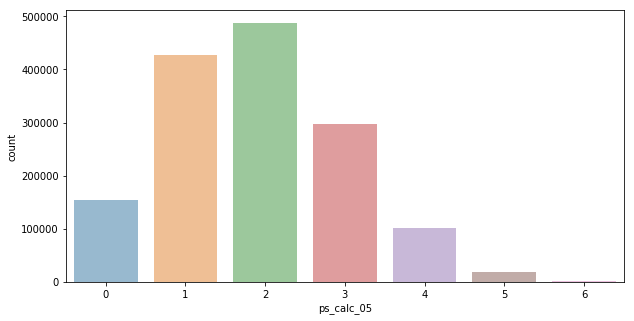

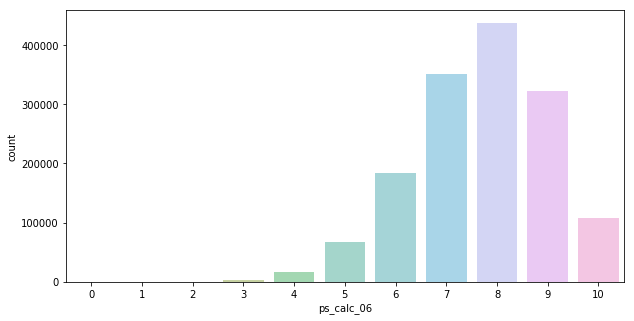

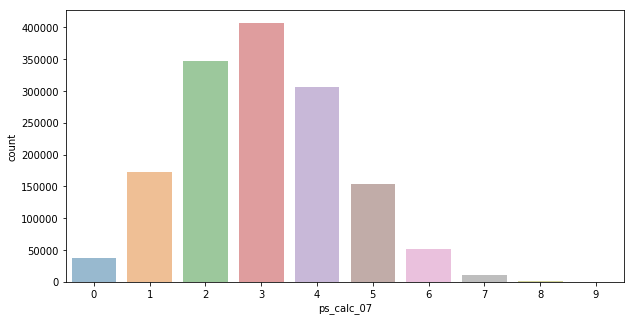

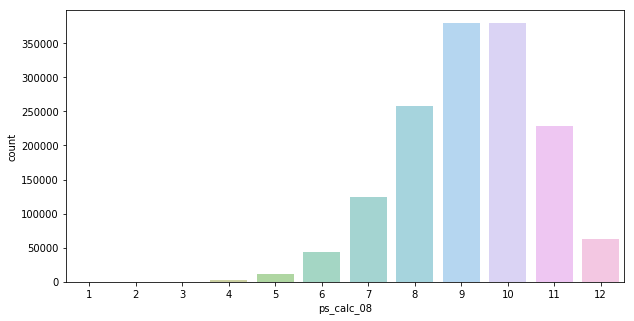

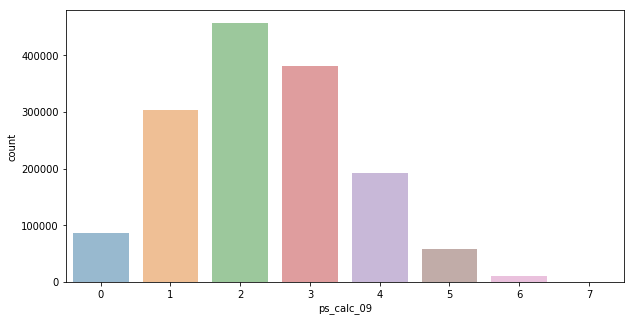

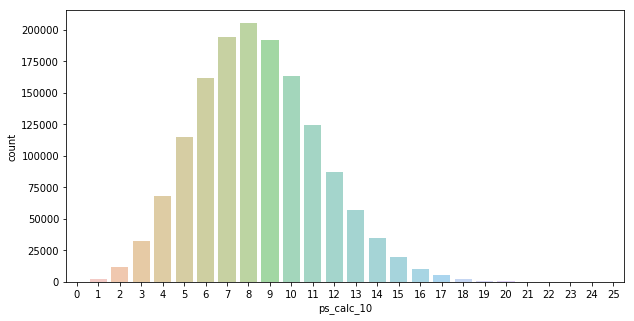

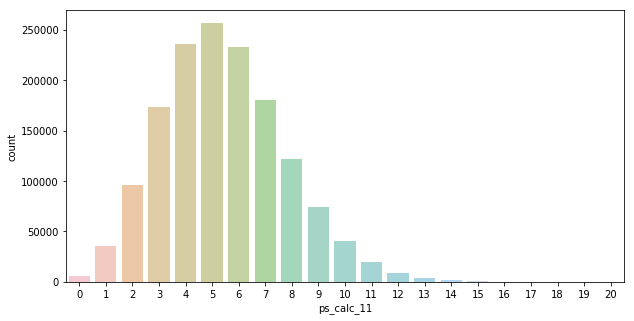

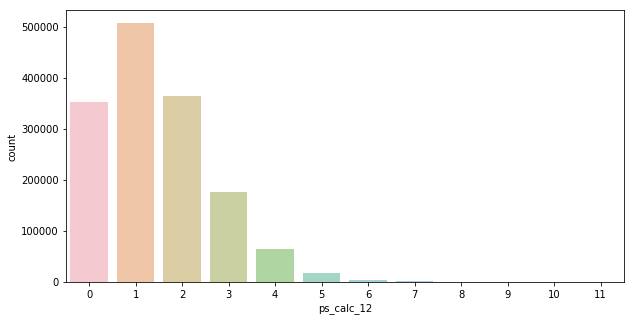

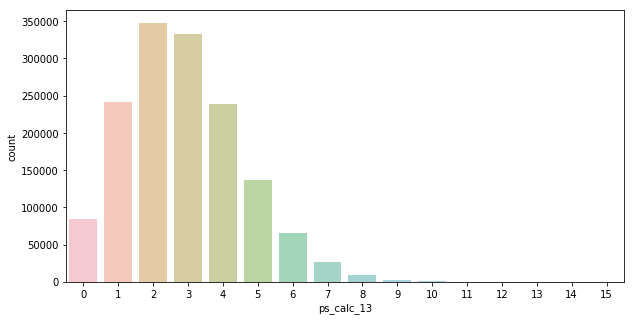

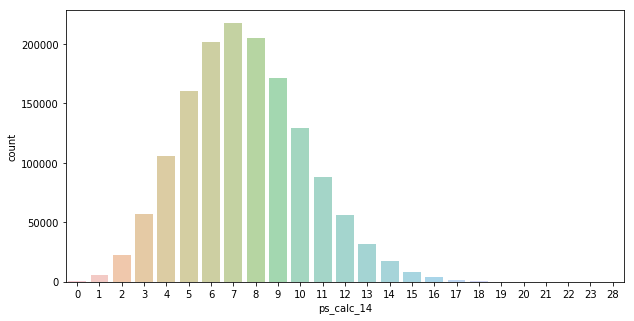

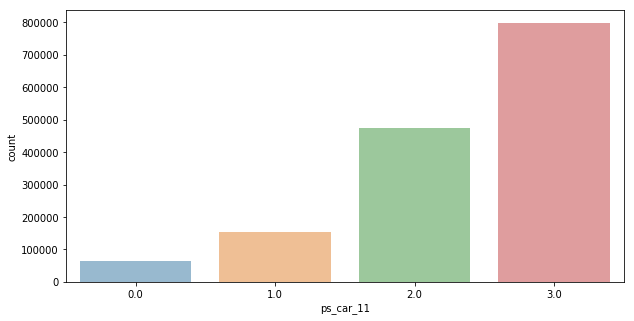

In [58]:
for col in binary+category+integer:
    bar_plot(col,df)

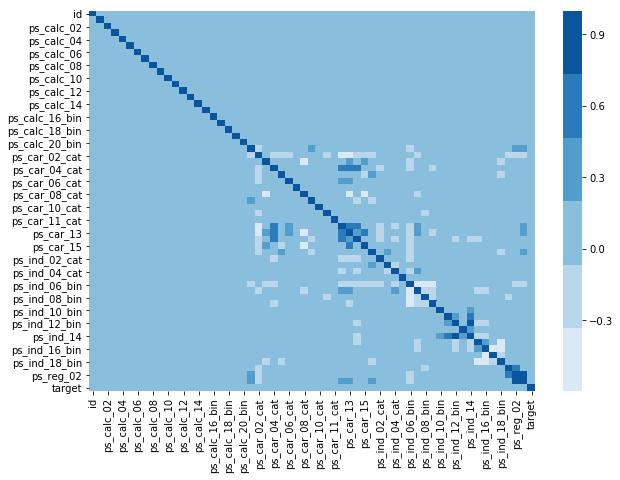

In [59]:
corr=df.corr()
cmap=sns.color_palette("Blues")
f, ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr, cmap=cmap)

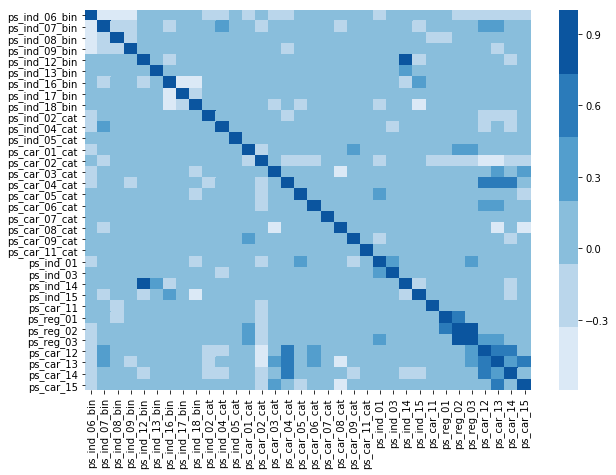

In [61]:
#일부 변수만 선별
features=['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin',
        'ps_ind_12_bin','ps_ind_13_bin','ps_ind_16_bin','ps_ind_17_bin',
          'ps_ind_18_bin','ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat',
          'ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat',
          'ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat',
          'ps_car_09_cat','ps_car_11_cat','ps_ind_01','ps_ind_03',
          'ps_ind_14','ps_ind_15','ps_car_11','ps_reg_01','ps_reg_02',
          'ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15']
corr_sub=df[features].corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr_sub, cmap=cmap)

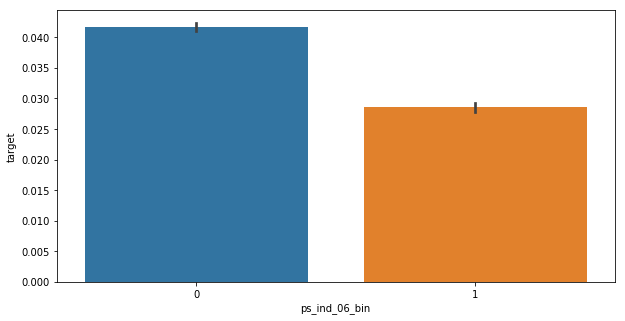

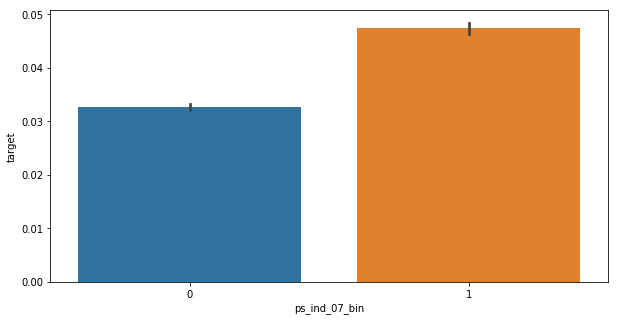

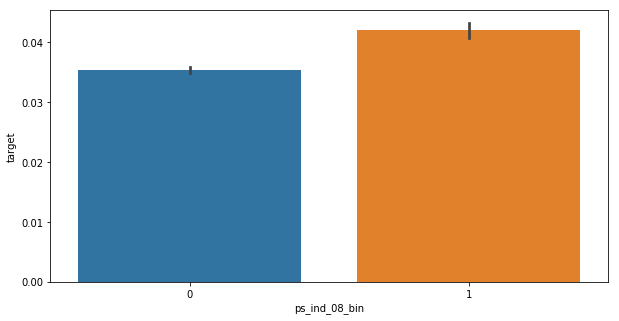

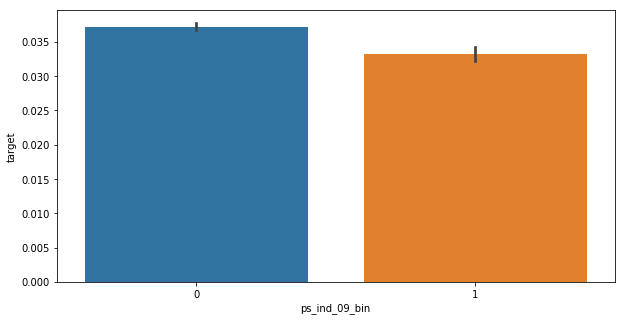

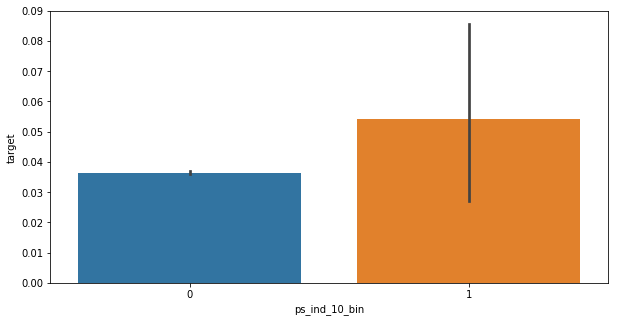

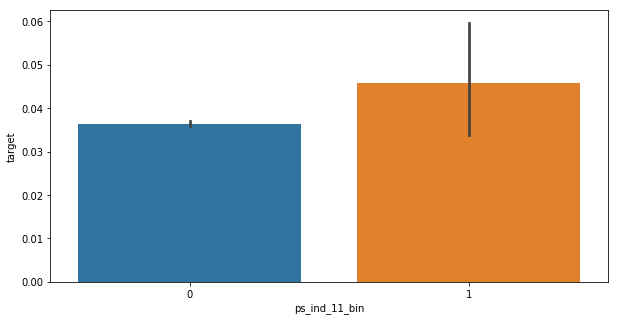

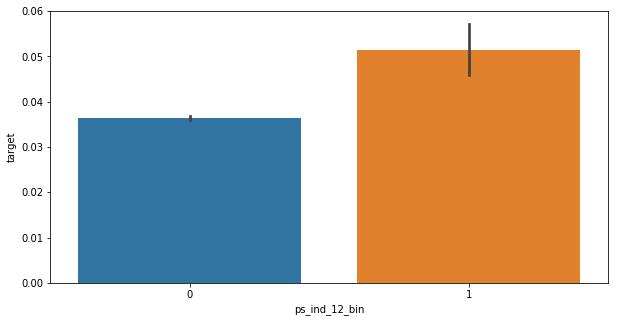

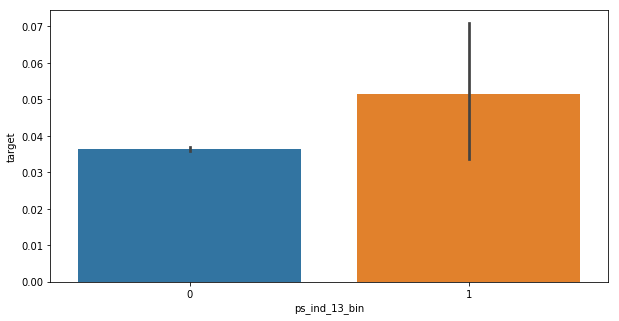

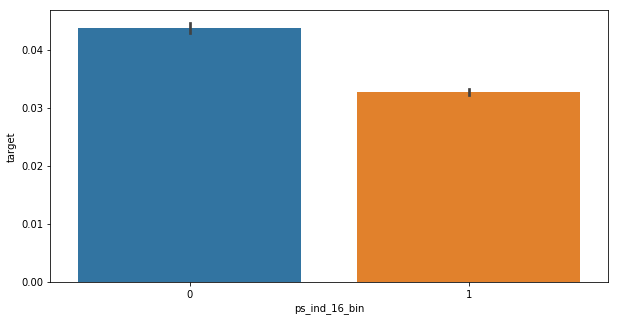

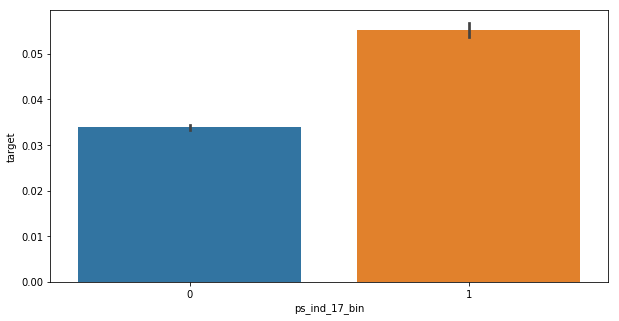

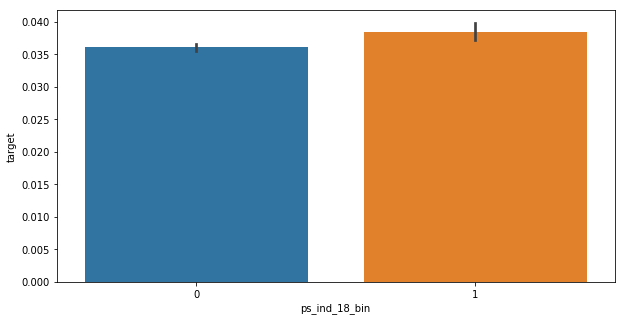

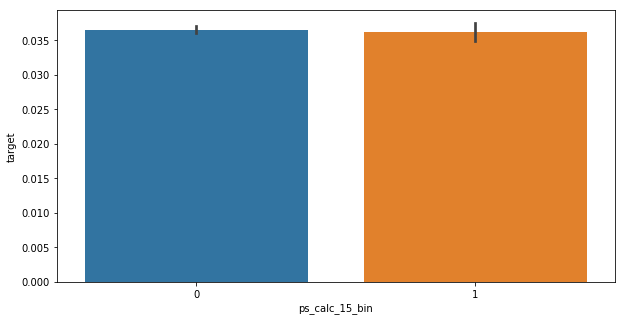

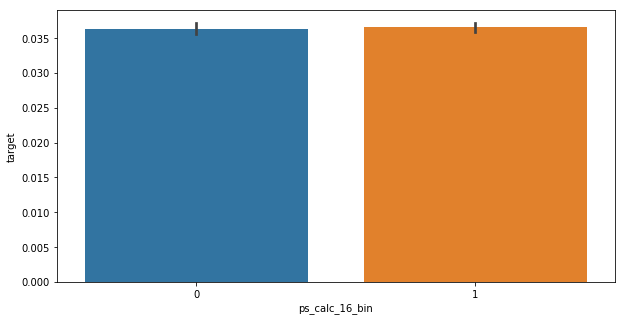

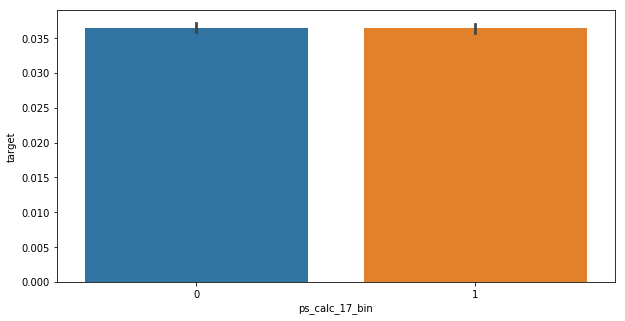

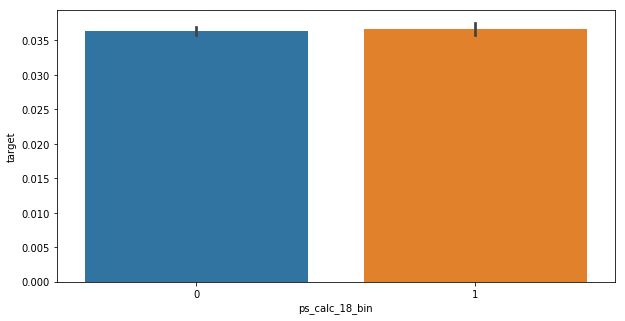

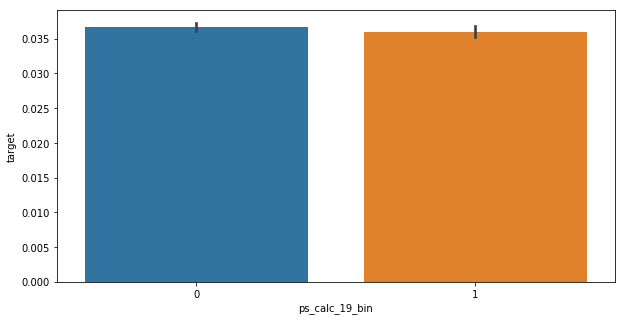

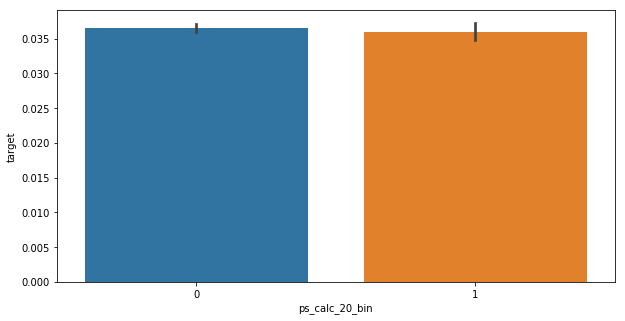

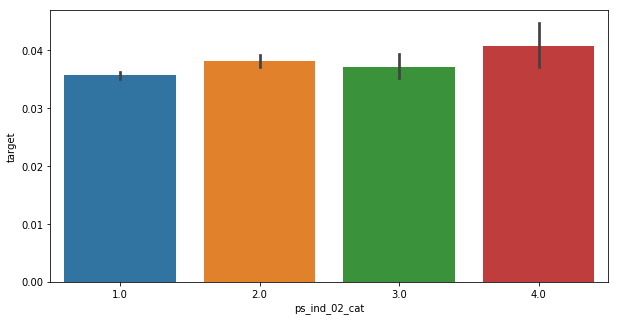

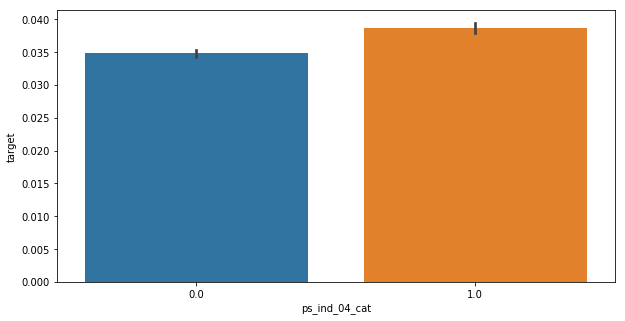

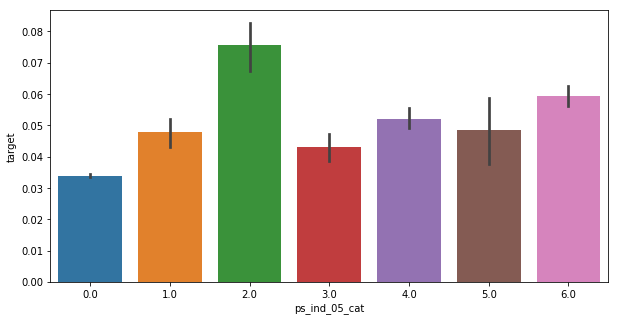

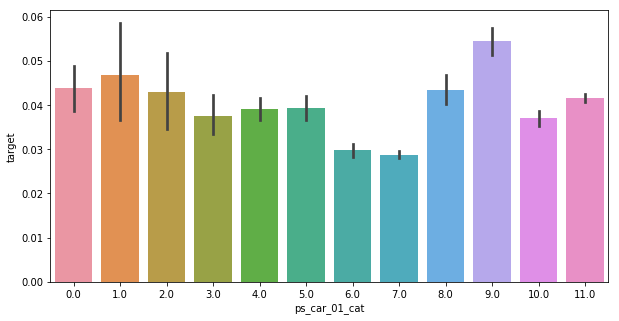

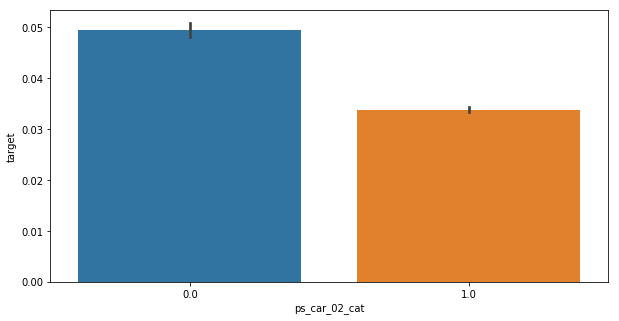

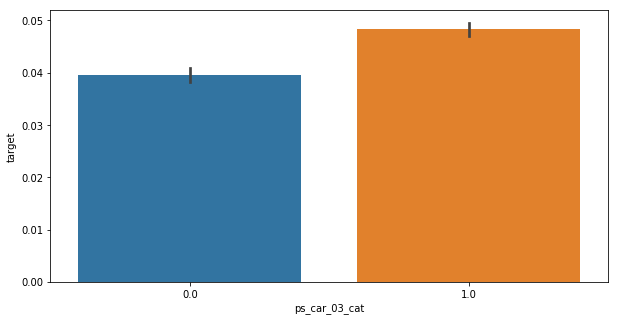

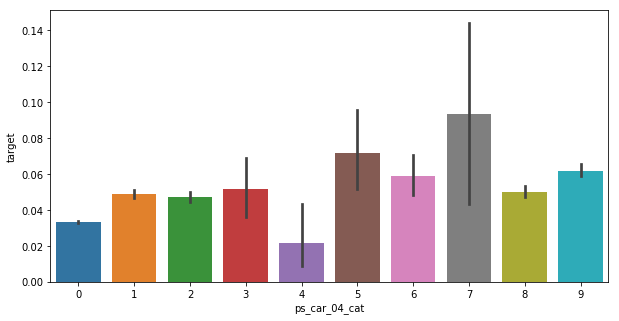

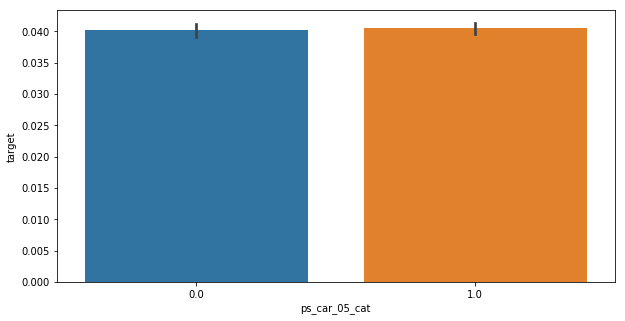

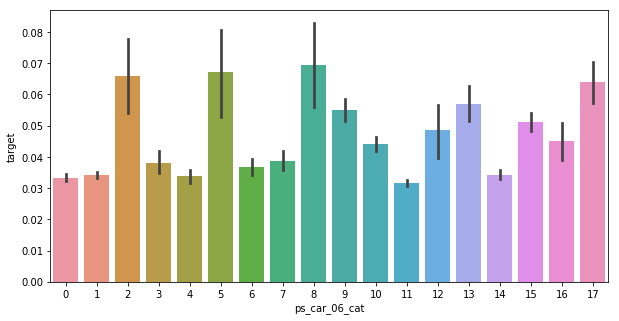

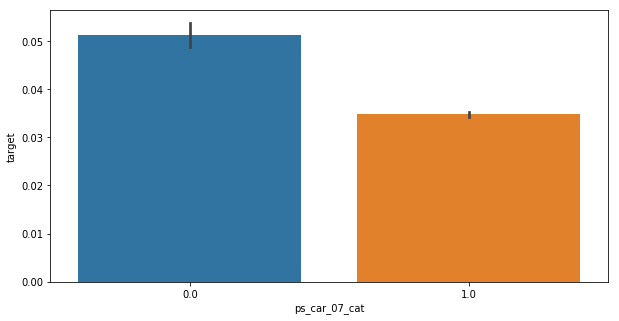

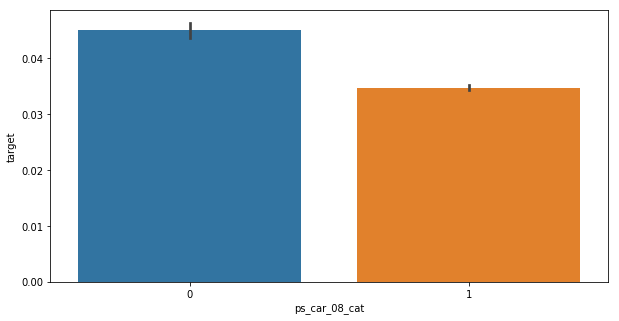

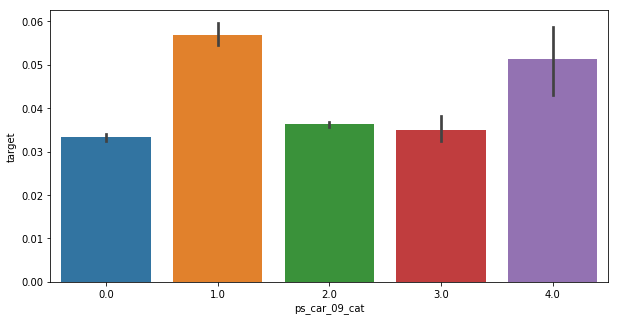

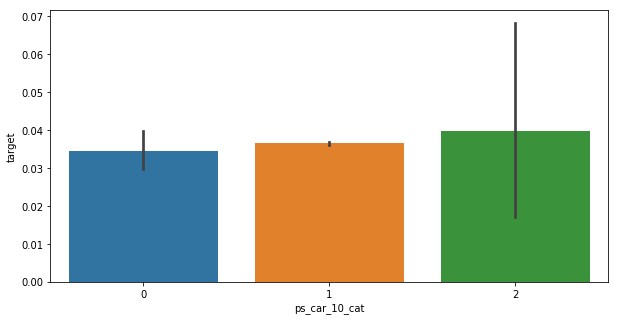

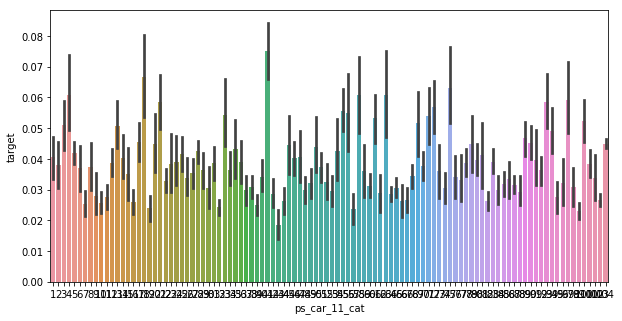

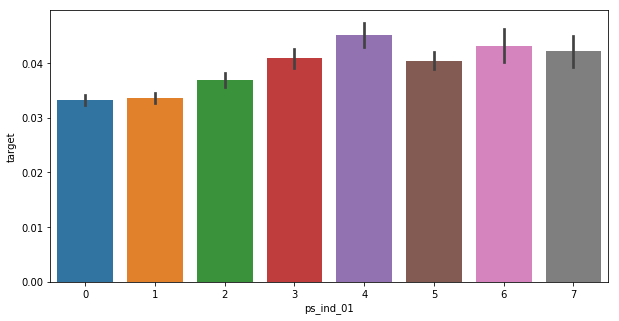

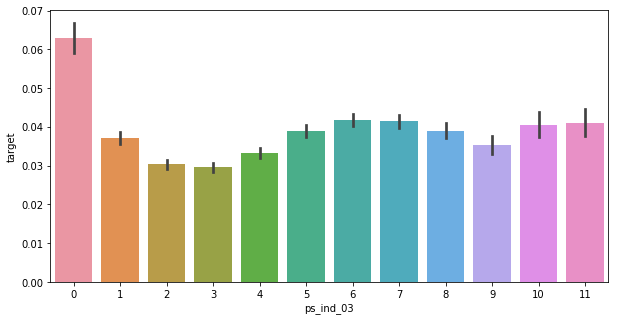

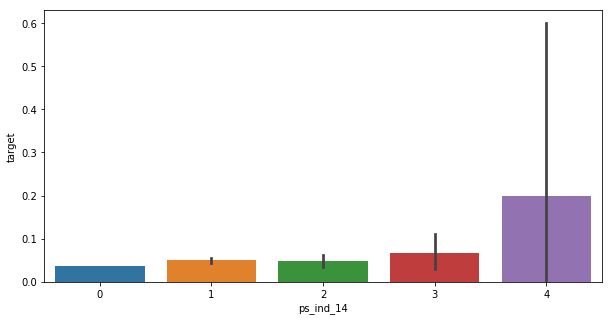

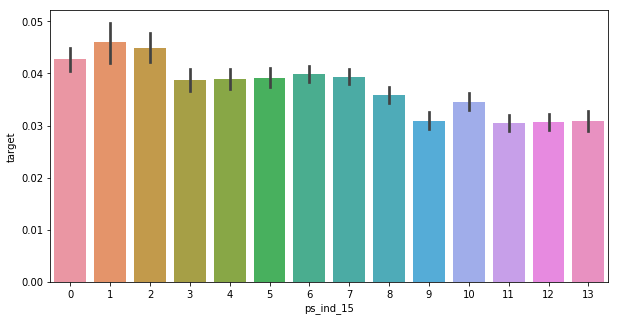

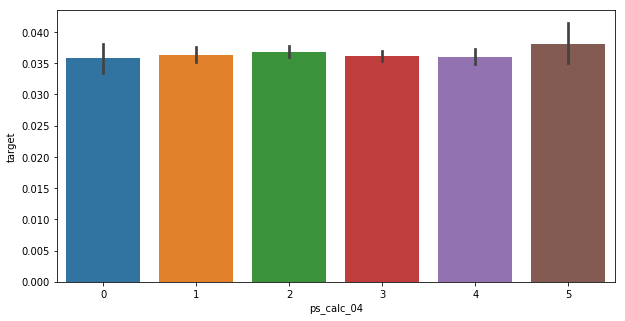

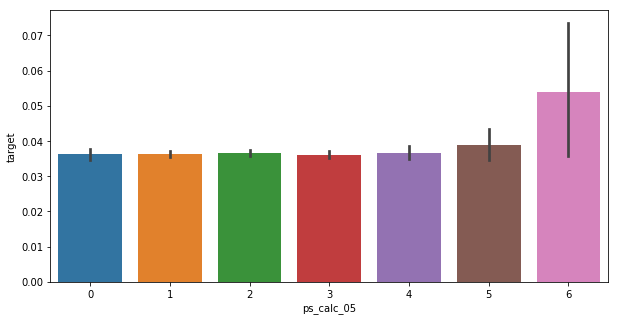

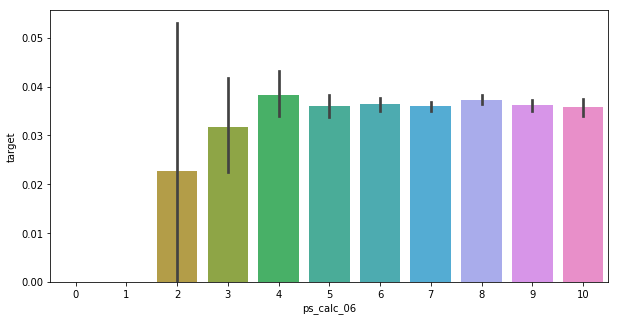

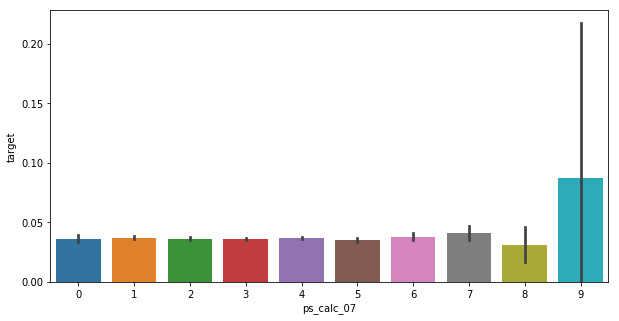

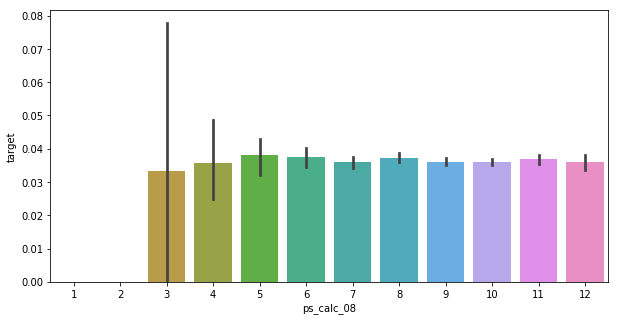

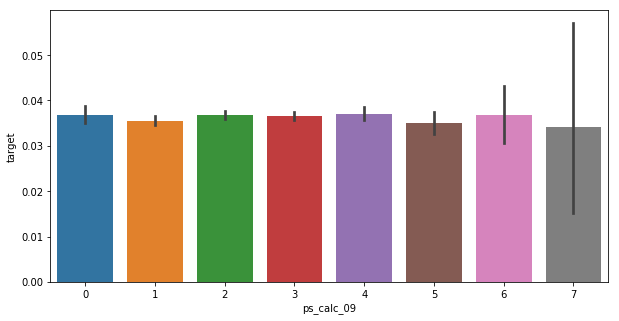

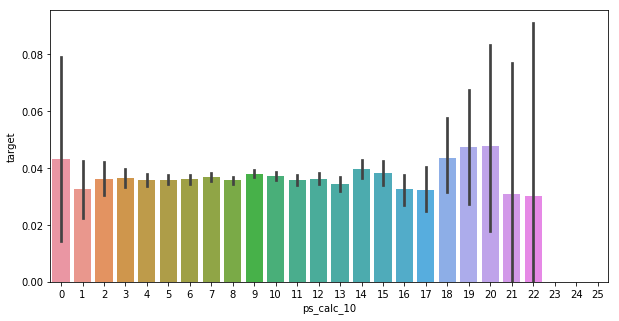

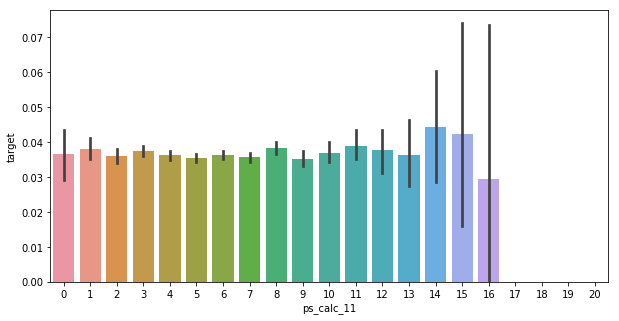

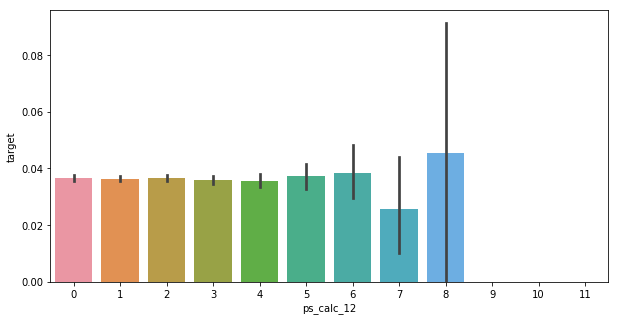

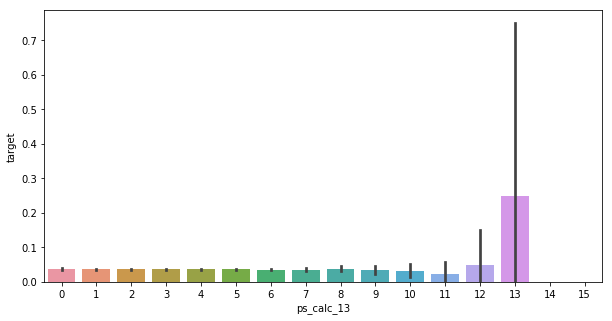

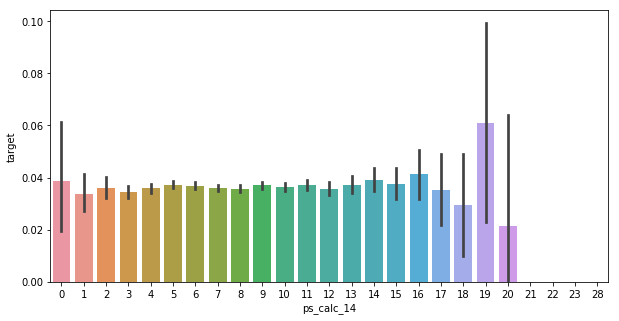

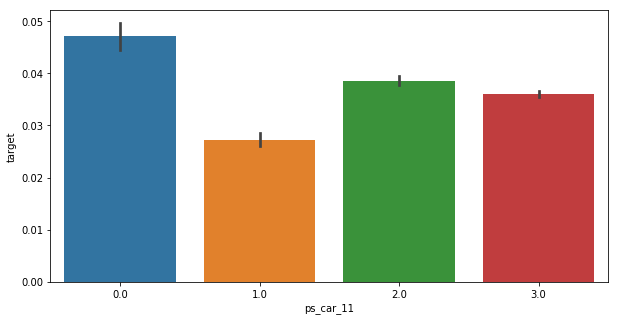

In [62]:
for col in (binary+category+integer):
    bar_plot_ci(col,df)

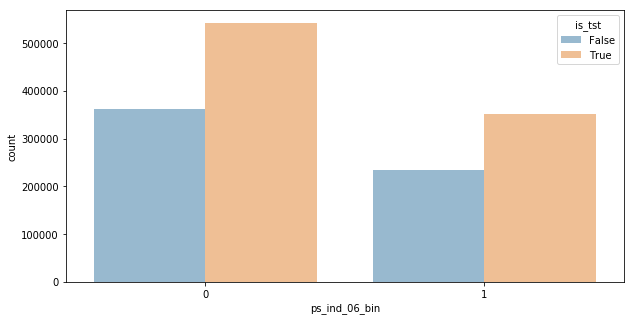

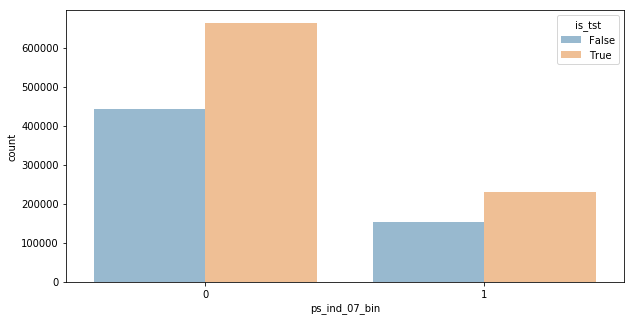

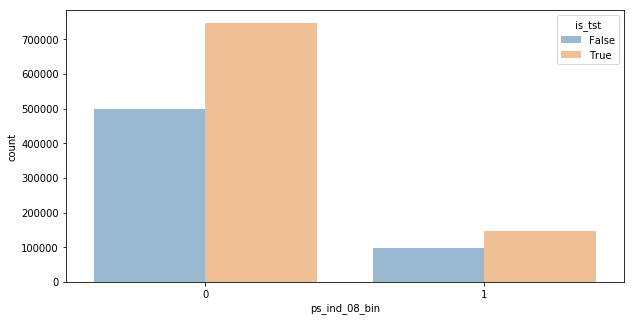

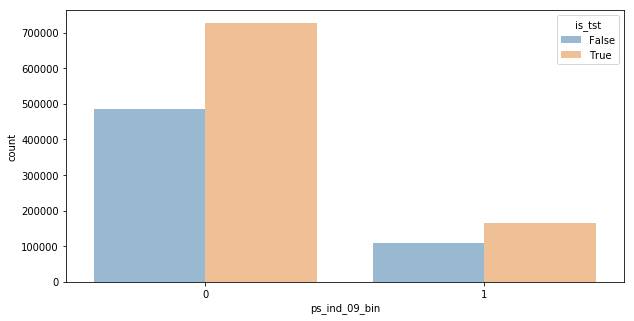

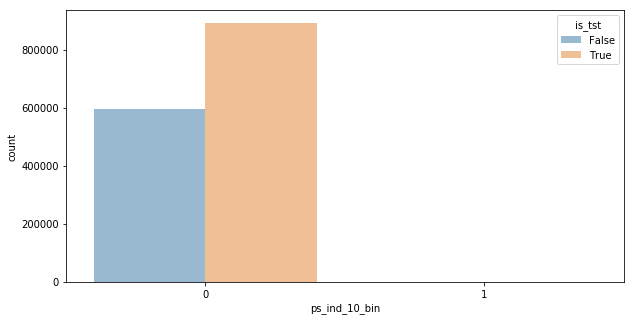

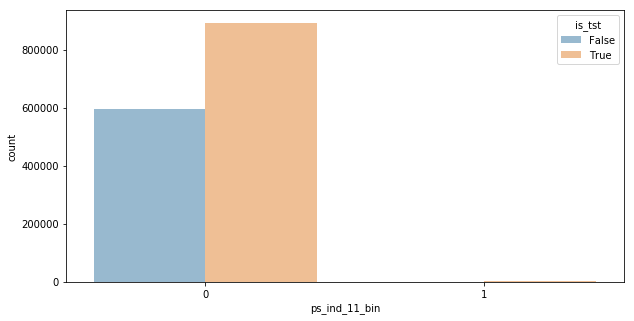

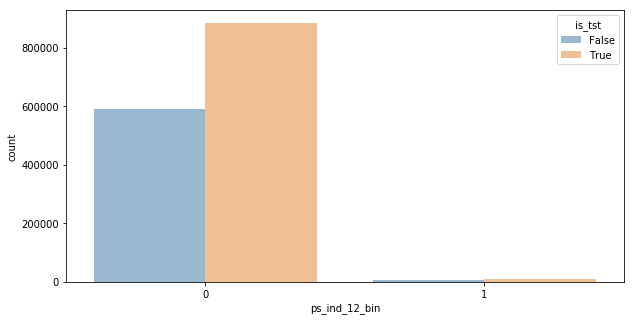

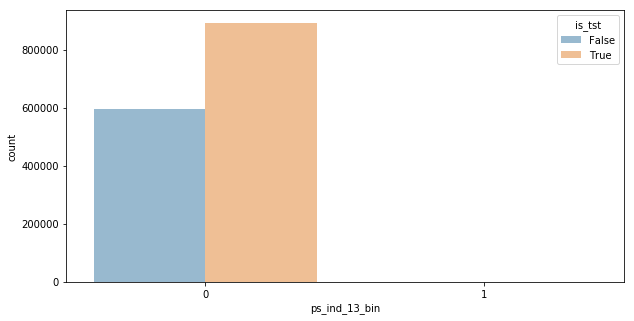

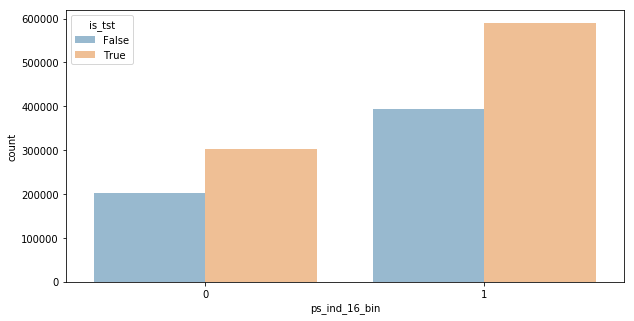

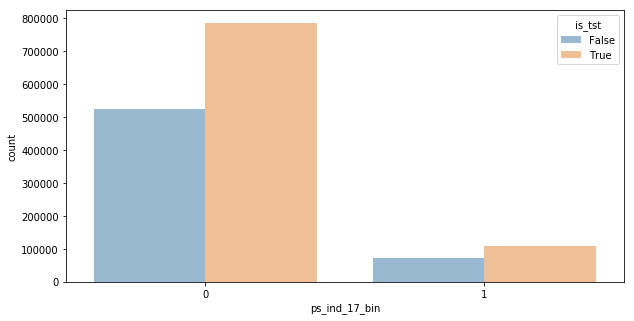

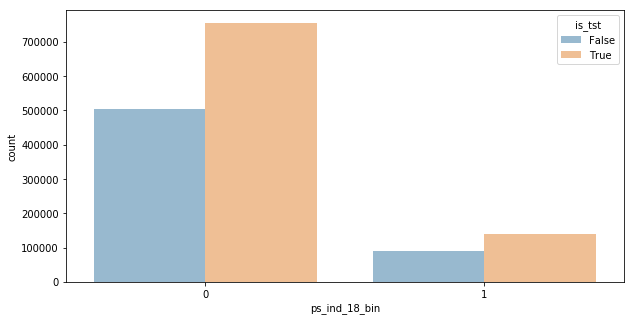

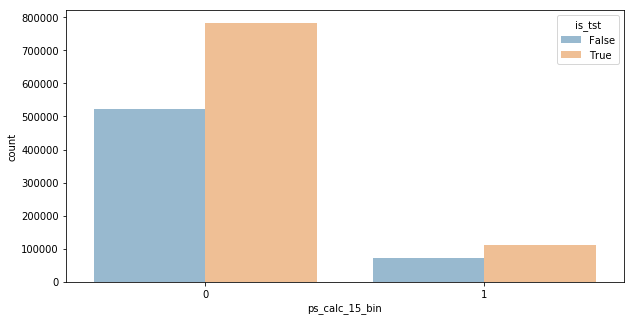

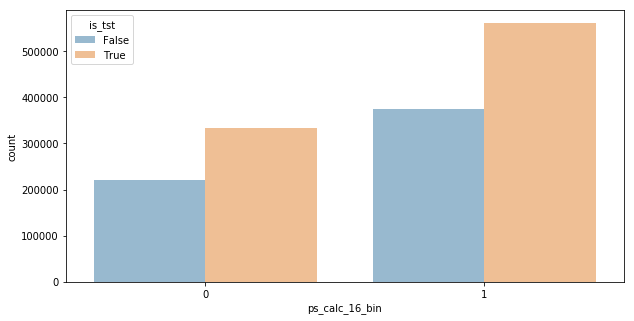

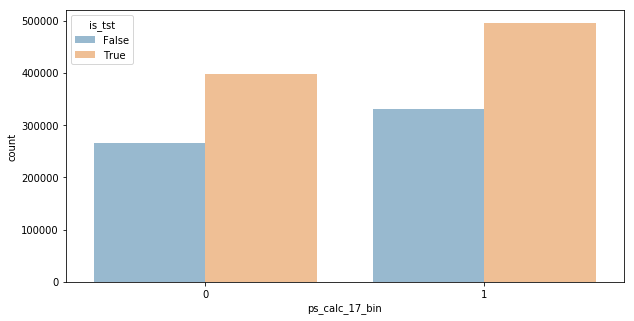

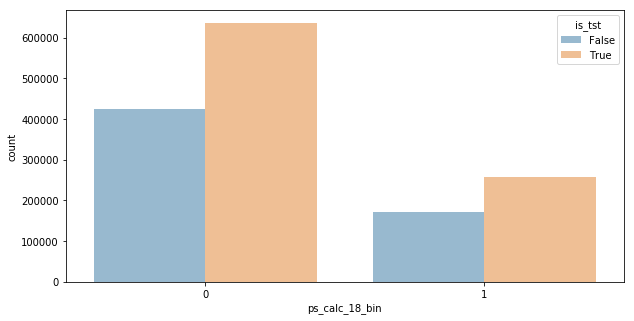

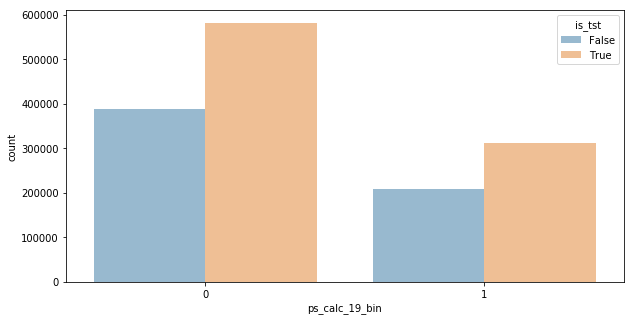

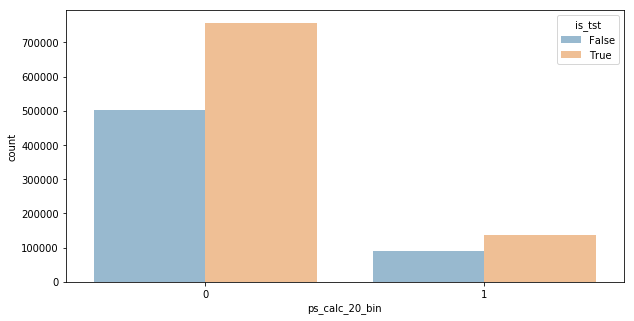

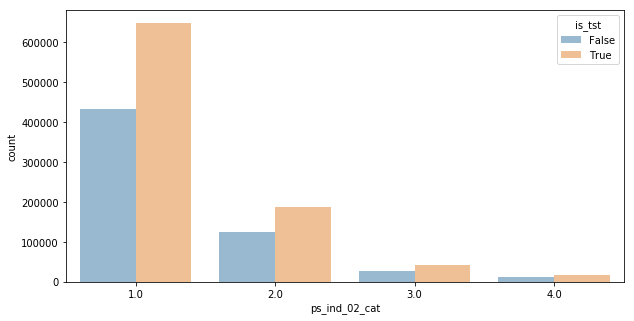

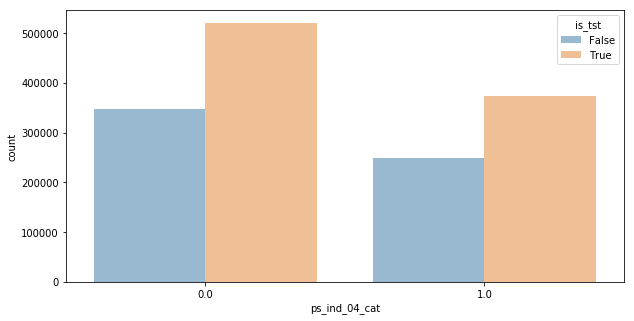

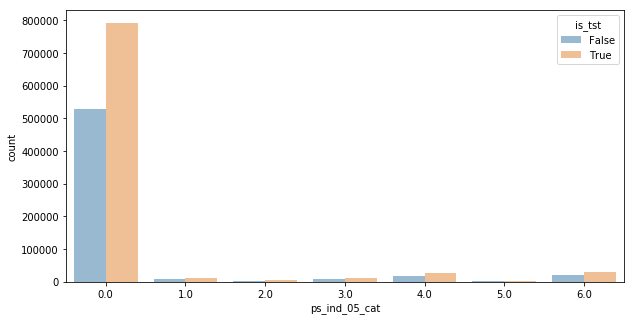

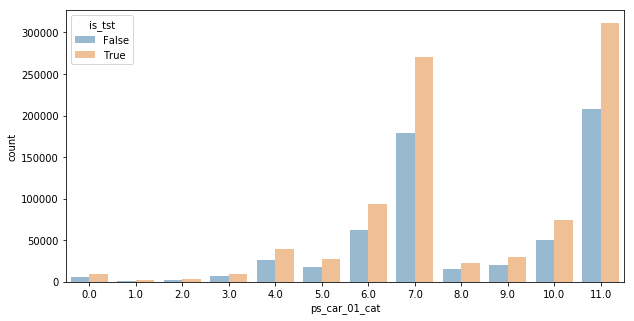

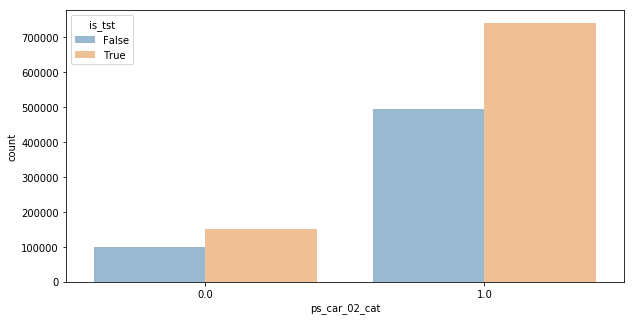

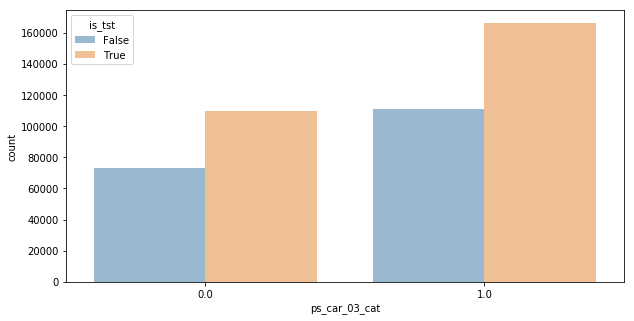

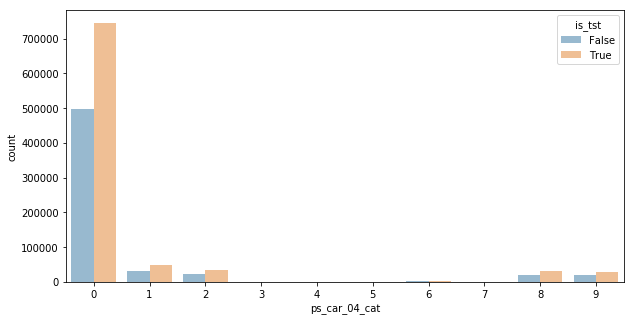

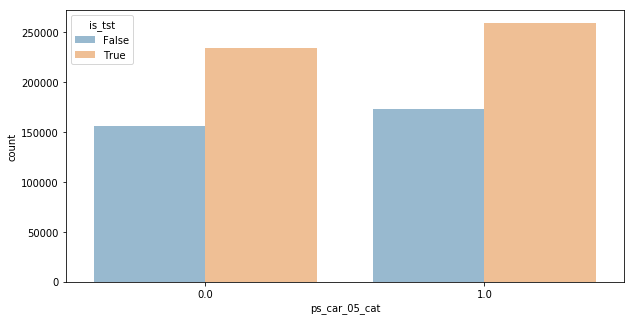

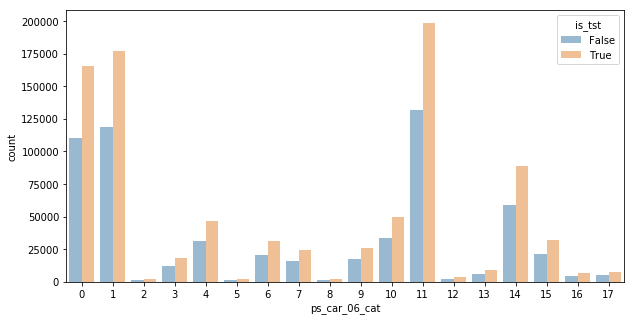

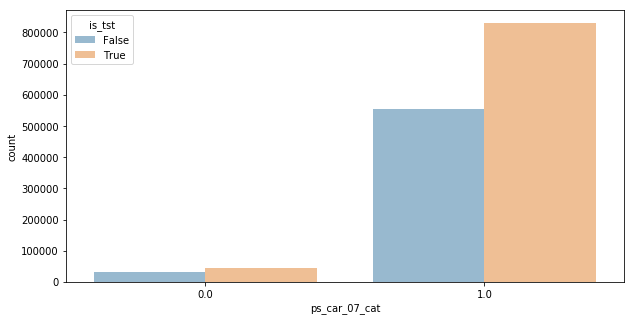

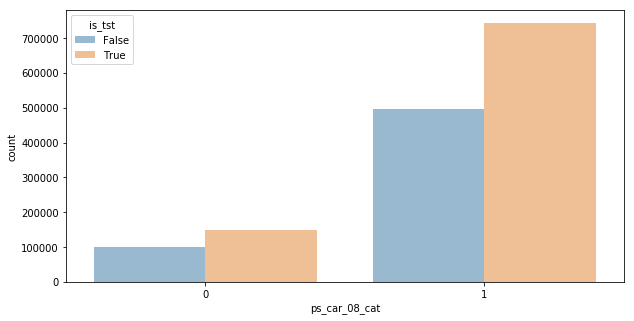

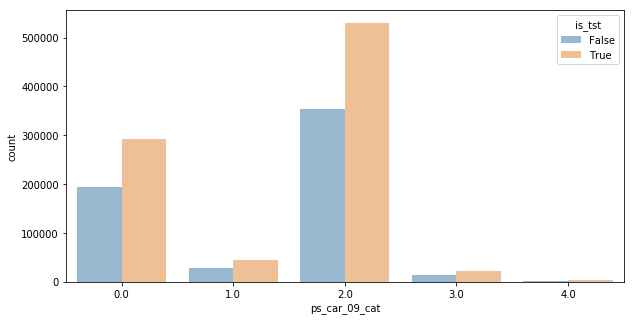

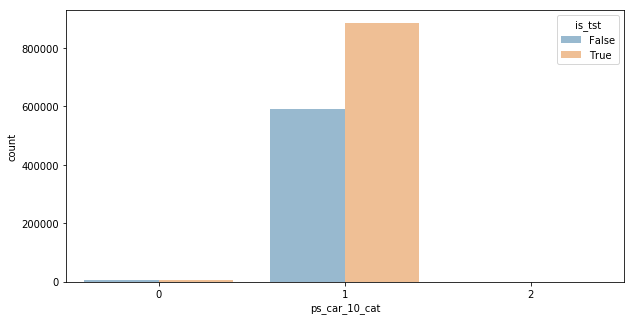

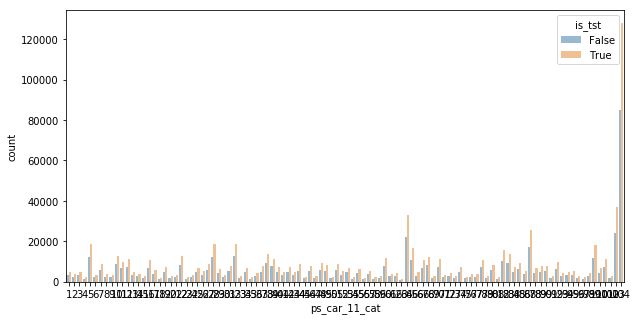

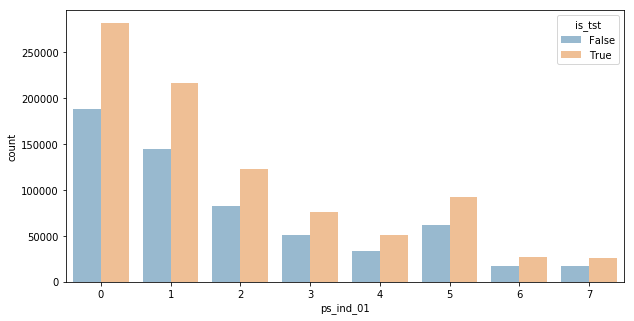

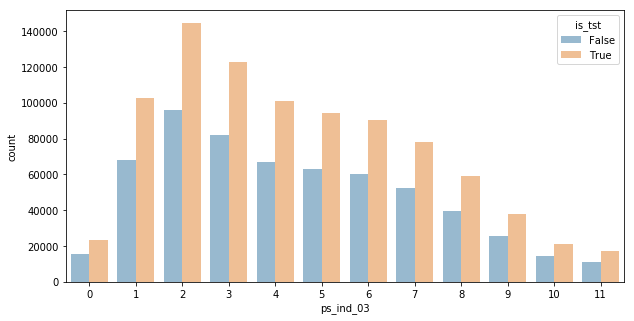

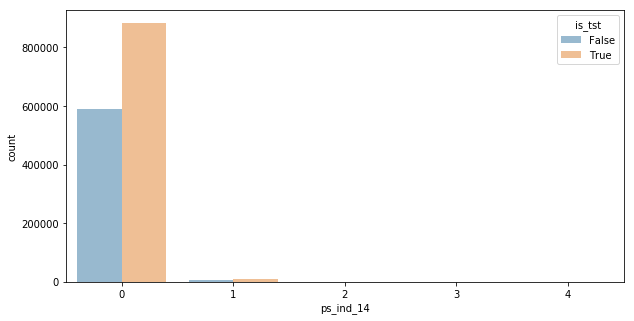

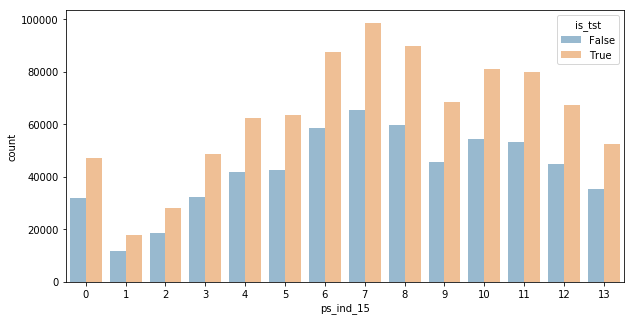

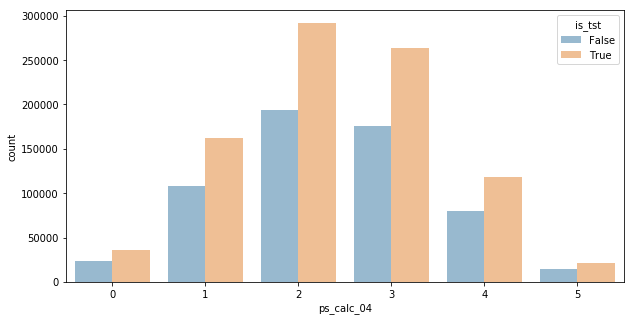

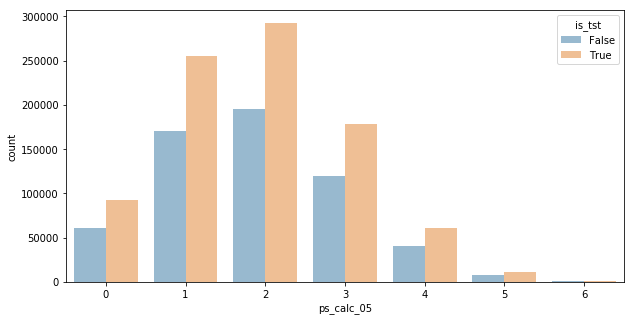

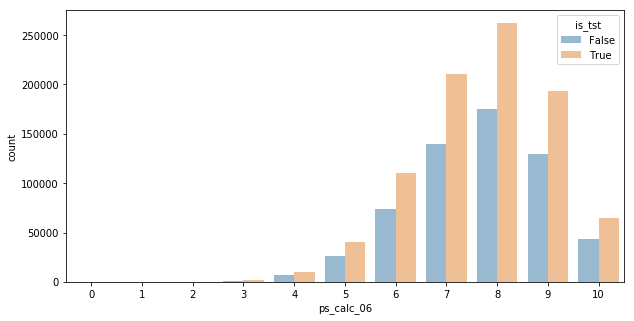

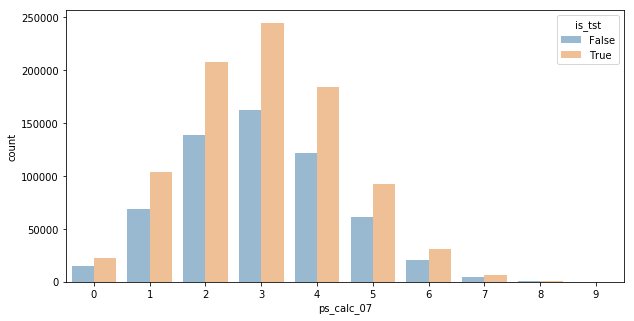

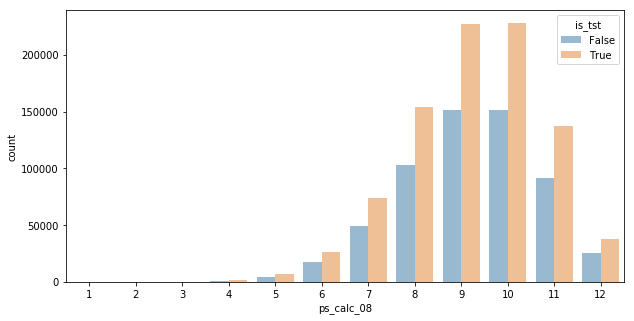

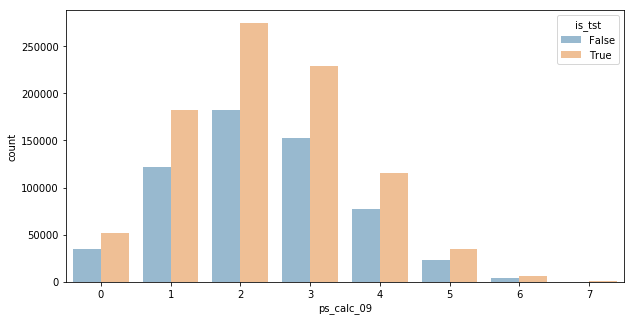

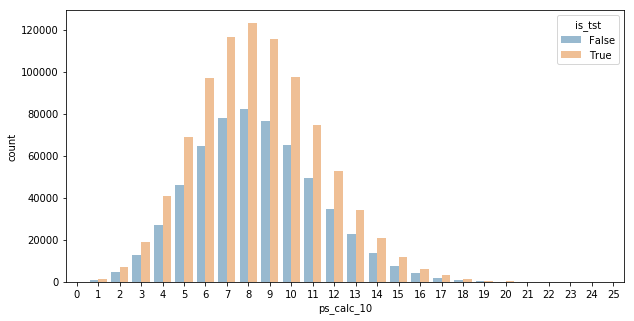

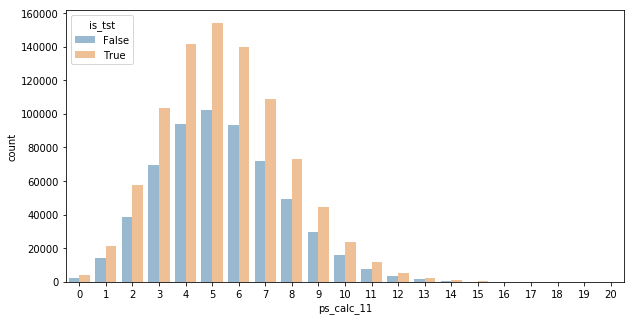

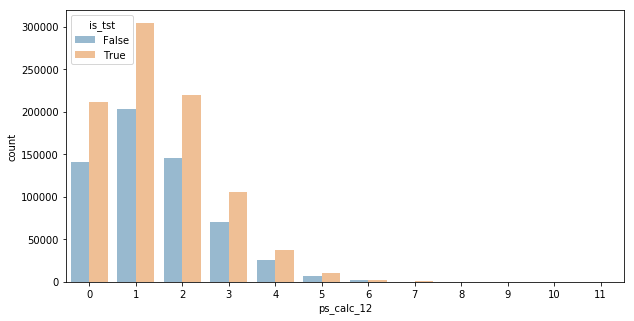

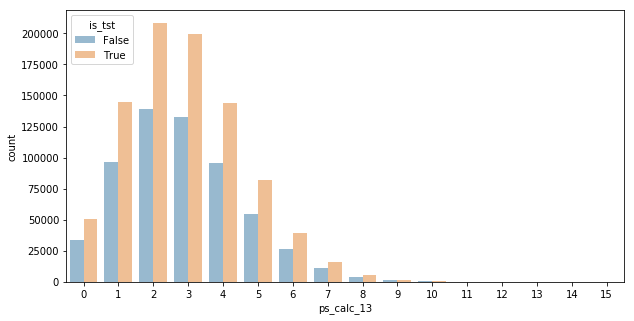

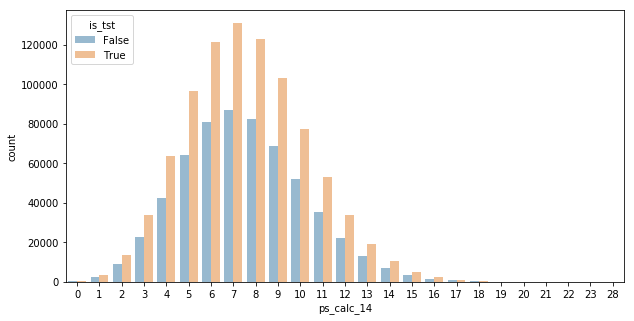

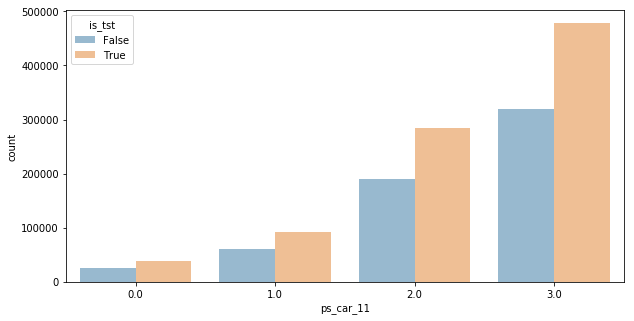

In [64]:
df['is_tst']=df['target'].isnull()
for col in binary+category+integer:
    bar_plot(col,df,'is_tst')